In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns
sns.set()

import phenalyze as ph

from sklearn.metrics import r2_score

# Lectura de datos

In [2]:
k_r_list = np.linspace(1,3,10)
h_list = np.linspace(1,4,10)
b_list = np.linspace(1,3,10)

In [3]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Activadores/RuidoIntrinseco/ActInt_h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresAct_IntData = pd.concat(datalist)
TresAct_IntData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresAct_IntData)

In [4]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Activadores/RuidoNeto/ActGlob_h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df = df.T
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresAct_NetData = pd.concat(datalist)
TresAct_NetData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresAct_NetData)

In [5]:
TresAct_int = TresAct_IntData.loc["CV2"]
TresAct_net = TresAct_NetData.loc["CV2"]

# DosAct_int = TresAct_int.loc[TresAct_int.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]
# DosAct_net = TresAct_net.loc[TresAct_net.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]


TresAct_efc = TresAct_net.copy()
TresAct_efc["RNA 1"] = TresAct_net["RNA 1"] - TresAct_int["RNA 1"]
TresAct_efc["Protein 1"] = TresAct_net["Protein 1"] - TresAct_int["Protein 1"]
TresAct_efc["RNA 2"] = TresAct_net["RNA 2"] - TresAct_int["RNA 2"]
TresAct_efc["Protein 2"] = TresAct_net["Protein 2"] - TresAct_int["Protein 2"]
TresAct_efc["RNA 3"] = TresAct_net["RNA 3"] - TresAct_int["RNA 3"]
TresAct_efc["Protein 3"] = TresAct_net["Protein 3"] - TresAct_int["Protein 3"]
display(TresAct_efc)

# DosAct_efc = DosAct_net.copy()
# DosAct_efc["RNA 2"] = DosAct_net["RNA 2"] - DosAct_int["RNA 2"]
# DosAct_efc["Protein 2"] = DosAct_net["Protein 2"] - DosAct_int["Protein 2"]
# display(DosAct_efc)

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.053481,0.030032,0.088876,0.059915,0.127824,0.092980
CV2,1.0,1.0,1.222222,0.053899,0.030018,0.089901,0.060055,0.127958,0.092423
CV2,1.0,1.0,1.444444,0.054176,0.029765,0.089363,0.059816,0.119822,0.085719
CV2,1.0,1.0,1.666667,0.054317,0.029444,0.089867,0.057841,0.116595,0.081541
CV2,1.0,1.0,1.888889,0.053413,0.030008,0.089598,0.059073,0.111977,0.078328
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.054854,0.030478,0.066185,0.038355,0.116297,0.074604
CV2,4.0,3.0,2.333333,0.053676,0.029817,0.065098,0.038378,0.097427,0.061606
CV2,4.0,3.0,2.555556,0.053724,0.029911,0.065009,0.038380,0.087115,0.054051
CV2,4.0,3.0,2.777778,0.054376,0.030209,0.065449,0.038434,0.078541,0.047677


In [6]:
exp_act1 = TresAct_efc["Protein 1"].to_numpy().reshape(10,10,10)
exp_act2 = TresAct_efc["Protein 2"].to_numpy().reshape(10,10,10)
exp_act3 = TresAct_efc["Protein 3"].to_numpy().reshape(10,10,10)

exp_act_p1 = TresAct_NetData.loc["Mean"]["Protein 1"].to_numpy().reshape(10,10,10)
exp_act_p2 = TresAct_NetData.loc["Mean"]["Protein 2"].to_numpy().reshape(10,10,10)
exp_act_p3 = TresAct_NetData.loc["Mean"]["Protein 3"].to_numpy().reshape(10,10,10)

In [7]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Represores/RuidoIntrinseco/h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresRep_IntData = pd.concat(datalist)
TresRep_IntData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresRep_IntData)

In [8]:
datalist = []

for h_i in h_list:
    for k_r in k_r_list:
        for b_i in b_list:
            df = pd.read_csv(f"Data_RangoParcial/Represores/RuidoNeto/h{h_i:.1f}_kr{k_r:.1f}_b{b_i:.1f}.csv", header=0, index_col=0)
            df = df.T
            df.insert(0, "h", [h_i, h_i])
            df.insert(1, "kr", [k_r, k_r])
            df.insert(2, "Beta", [b_i, b_i])
            datalist.append(df)

TresRep_NetData = pd.concat(datalist)
TresRep_NetData.columns = ['h', 'kr', 'Beta', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2', 'RNA 3', 'Protein 3']
# display(TresRep_NetData)

In [9]:
TresRep_int = TresRep_IntData.loc["CV2"]
TresRep_net = TresRep_NetData.loc["CV2"]

# DosRep_int = TresRep_int.loc[TresRep_int.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]
# DosRep_net = TresRep_net.loc[TresRep_net.Beta==b_list[6]][['h', 'kr', 'RNA 1', 'Protein 1', 'RNA 2', 'Protein 2']]


TresRep_efc = TresRep_net.copy()
TresRep_efc["RNA 1"] = TresRep_net["RNA 1"] - TresRep_int["RNA 1"]
TresRep_efc["Protein 1"] = TresRep_net["Protein 1"] - TresRep_int["Protein 1"]
TresRep_efc["RNA 2"] = TresRep_net["RNA 2"] - TresRep_int["RNA 2"]
TresRep_efc["Protein 2"] = TresRep_net["Protein 2"] - TresRep_int["Protein 2"]
TresRep_efc["RNA 3"] = TresRep_net["RNA 3"] - TresRep_int["RNA 3"]
TresRep_efc["Protein 3"] = TresRep_net["Protein 3"] - TresRep_int["Protein 3"]
display(TresRep_efc)

# DosRep_efc = DosRep_net.copy()
# DosRep_efc["RNA 2"] = DosRep_net["RNA 2"] - DosRep_int["RNA 2"]
# DosRep_efc["Protein 2"] = DosRep_net["Protein 2"] - DosRep_int["Protein 2"]
# display(DosRep_efc)

,h,kr,Beta,RNA 1,Protein 1,RNA 2,Protein 2,RNA 3,Protein 3
CV2,1.0,1.0,1.000000,0.054328,0.030475,0.037827,0.017288,0.046525,0.022194
CV2,1.0,1.0,1.222222,0.052843,0.029857,0.039080,0.016922,0.040983,0.020924
CV2,1.0,1.0,1.444444,0.056169,0.030342,0.042359,0.018081,0.039767,0.019568
CV2,1.0,1.0,1.666667,0.055690,0.030184,0.039822,0.016597,0.041469,0.018615
CV2,1.0,1.0,1.888889,0.054321,0.030175,0.037784,0.016564,0.038339,0.018270
...,...,...,...,...,...,...,...,...,...
CV2,4.0,3.0,2.111111,0.054652,0.030361,-0.021023,0.238755,0.054156,0.030375
CV2,4.0,3.0,2.333333,0.053718,0.029577,-0.006540,0.218955,0.053608,0.030008
CV2,4.0,3.0,2.555556,0.053647,0.030036,0.079579,0.244522,0.053702,0.029770
CV2,4.0,3.0,2.777778,0.053478,0.030016,0.059044,0.246426,0.053646,0.029994


In [10]:
exp_rep1 = TresRep_efc["Protein 1"].to_numpy().reshape(10,10,10)
exp_rep2 = TresRep_efc["Protein 2"].to_numpy().reshape(10,10,10)
exp_rep3 = TresRep_efc["Protein 3"].to_numpy().reshape(10,10,10)

exp_rep_p2 = TresRep_NetData.loc["Mean"]["Protein 2"].to_numpy().reshape(10,10,10)
exp_rep_p3 = TresRep_NetData.loc["Mean"]["Protein 3"].to_numpy().reshape(10,10,10)
exp_rep_p1 = TresRep_NetData.loc["Mean"]["Protein 1"].to_numpy().reshape(10,10,10)

# Computar modelo analítico

In [11]:
η_g = 0.25
γ_z = (1/60 + 1/18)/2
k_z = γ_z/(η_g**2)

In [12]:
def compute_ss(tt_params:list):
    kr, γr, kp, γp = tt_params
    r_ss = kr/γr
    p_ss = r_ss*kp/γp
    return  r_ss, p_ss

def η_int(tt_params:list):
    kr, γr, kp, γp = tt_params
    r_ss, p_ss = compute_ss(tt_params)
    return (1/p_ss) + (1/r_ss)*(γp/(γr+γp))

def repressor(p, α, β, k, h):
    return α + β * (k**h / (k**h + p**h))

def activator(p, α, β, k, h):
    return α + β * (p**h / (k**h + p**h))

def f_ss(conection:str, tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)

    if conection.lower()=="activador" or conection.lower()=="activator":
        return activator(p_ss, α, β, k, h)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        return repressor(p_ss, α, β, k, h)
    else:
        print(f"Qué mondá es un f{conection}")
    

def compute_H_repressor(tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)
    return (h*(k**h)*(p_ss**h)*β) / (((k**h)+(p_ss**h)) * ((α*(p_ss**h))+((k**h)*(α+β))))

def compute_H_activator(tt_params:list, hill_params:list):
    kr, γr, kp, γp = tt_params
    α, β, k, h = hill_params
    r_ss, p_ss = compute_ss(tt_params)
    return -(h*(k**h)*(p_ss**h)*β) / (((k**h)+(p_ss**h)) * ((α*(k**h))+((p_ss**h)*(α+β))))

In [13]:
def η_1g(conection:str, η_g:float):
    return η_g

def η_2g(conection:str, η_g:float, tt_params_1:list, hill_params_12:list):

    if conection.lower()=="activador" or conection.lower()=="activator":
        H21 = compute_H_activator(tt_params_1, hill_params_12)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        H21 = compute_H_repressor(tt_params_1, hill_params_12)
    else:
        print(f"Qué mondá es un f{conection}")

    return η_g*(1 - (3/2)*H21 + (3/4)*(H21**2))

def η_3g(conection:str, η_g:float, tt_params_1:list, hill_params_12:list, tt_params_2:list, hill_params_23:list):

    if conection.lower()=="activador" or conection.lower()=="activator":
        H21 = compute_H_activator(tt_params_1, hill_params_12)
        H32 = compute_H_activator(tt_params_2, hill_params_23)
    elif conection.lower()=="represor" or conection.lower()=="repressor":
        H21 = compute_H_repressor(tt_params_1, hill_params_12)
        H32 = compute_H_repressor(tt_params_2, hill_params_23)
    else:
        print(f"Qué mondá es un f{conection}")

    return η_g*(1 - (3/2)*H32 + H21*H32 + (5/8)*(H21**2)*(H32**2) - (5/4)*H21*(H32**2) + (3/4)*(H32**2))

In [14]:
"GLOBAL NOISE PARAMS"
η_g = np.concatenate((exp_act1[:,6,6],exp_rep1[:,6,6])).mean()
print(η_g)

"HILL PARAMS"
α = 0.0
β = b_list[6]
k = (1E3 + 1E4)/2
# β_i = (2 + 3)/2
# h_i = 2.0

"TRANSCRIPTION PARAMS"
γ_r = (1/8 + 1/3)/2
k_p = (10 + 60)/2
γ_p = (1/60 + 1/18)/2
# k_r = (1 + 2)/2

0.029903311470014775


In [15]:
h_var = TresAct_efc["h"]["CV2"].to_numpy().reshape(10,10,10)
kr_var = TresAct_efc["kr"]["CV2"].to_numpy().reshape(10,10,10)
β_var = TresAct_efc["Beta"]["CV2"].to_numpy().reshape(10,10,10)


tt_params_1 = [kr_var, γ_r, k_p, γ_p]
hill_params_12 = [α, β_var, k, h_var]
k_r2 = f_ss("Activator", tt_params_1, hill_params_12)
tt_params_2 = [k_r2, γ_r, k_p, γ_p]
hill_params_23 = [α, β, k, h_var]
k_r3 = f_ss("Activator", tt_params_2, hill_params_23)
tt_params_3 = [k_r3, γ_r, k_p, γ_p]

calc_act1 = η_1g("Activator", η_g) * np.ones((10,10,10))
calc_act2 = η_2g("Activator", η_g, tt_params_1, hill_params_12)
calc_act3 = η_3g("Activator", η_g, tt_params_1, hill_params_12, tt_params_2, hill_params_23)
calc_act_p1 = compute_ss(tt_params_1)[1]
calc_act_p2 = compute_ss(tt_params_2)[1]
calc_act_p3 = compute_ss(tt_params_3)[1]


tt_params_1 = [kr_var, γ_r, k_p, γ_p]
hill_params_12 = [α, β_var, k, h_var]
k_r2 = f_ss("Repressor", tt_params_1, hill_params_12)
tt_params_2 = [k_r2, γ_r, k_p, γ_p]
hill_params_23 = [α, β, k, h_var]
k_r3 = f_ss("Repressor", tt_params_2, hill_params_23)
tt_params_3 = [k_r3, γ_r, k_p, γ_p]

calc_rep1 = η_1g("Repressor", η_g) * np.ones((10,10,10))
calc_rep2 = η_2g("Repressor", η_g, tt_params_1, hill_params_12)
calc_rep3 = η_3g("Repressor", η_g, tt_params_1, hill_params_12, tt_params_2, hill_params_23)
calc_rep_p1 = compute_ss(tt_params_1)[1]
calc_rep_p2 = compute_ss(tt_params_2)[1]
calc_rep_p3 = compute_ss(tt_params_3)[1]

# $R^2$ resultante 

In [16]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [17]:
R2Tensor = np.load("R2_Activators.npz")
R2DosAct = R2Tensor["DosGlob"]
R2TresAct = R2Tensor["TresGlob"]
R2Tensor = np.load("R2_Repressors.npz")
R2DosRep = R2Tensor["DosGlob"]
R2TresRep = R2Tensor["TresGlob"]

## Activadores

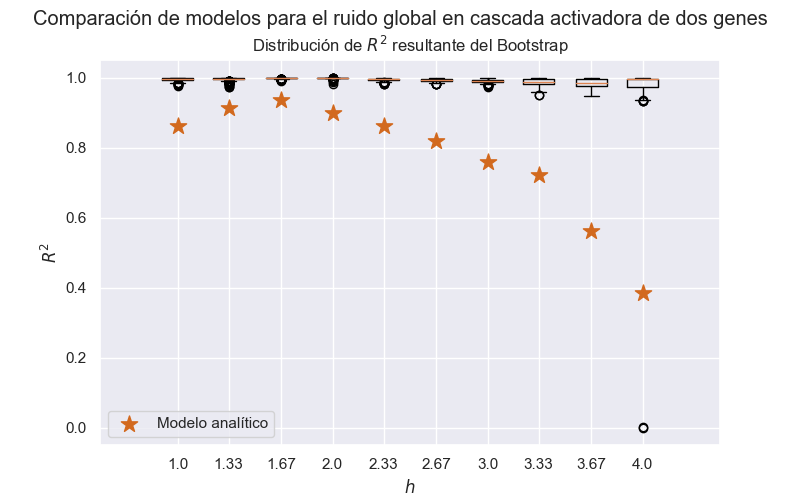

In [18]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2DosAct).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act2[i,:,6],calc_act2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act2[-1,:,6],calc_act2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada activadora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/act2glob.png", dpi=1000)

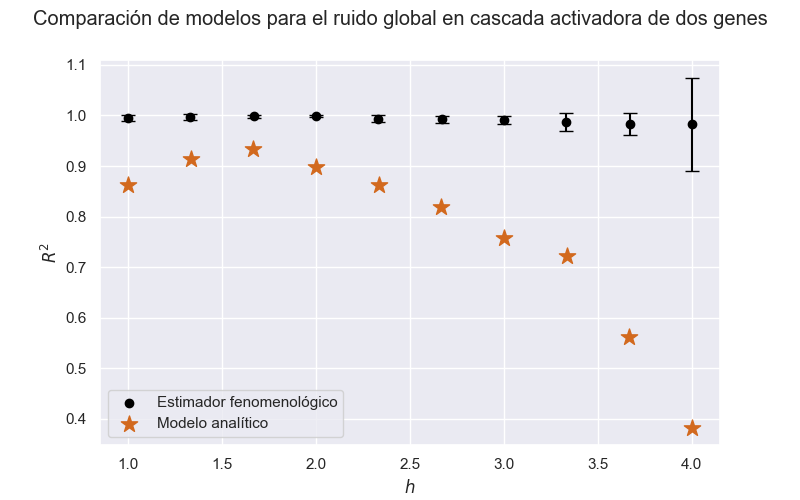

In [19]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2DosAct, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2DosAct, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act2[i,:,6],calc_act2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act2[-1,:,6],calc_act2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada activadora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/act2glob.png", dpi=1000)

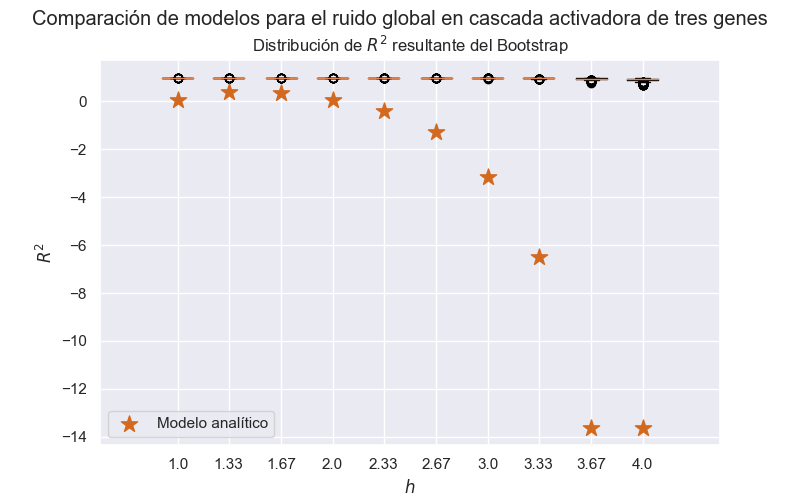

In [20]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2TresAct).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act3[i,:,:],calc_act3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act3[i,:,:],calc_act3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada activadora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/act3glob.png", dpi=1000)

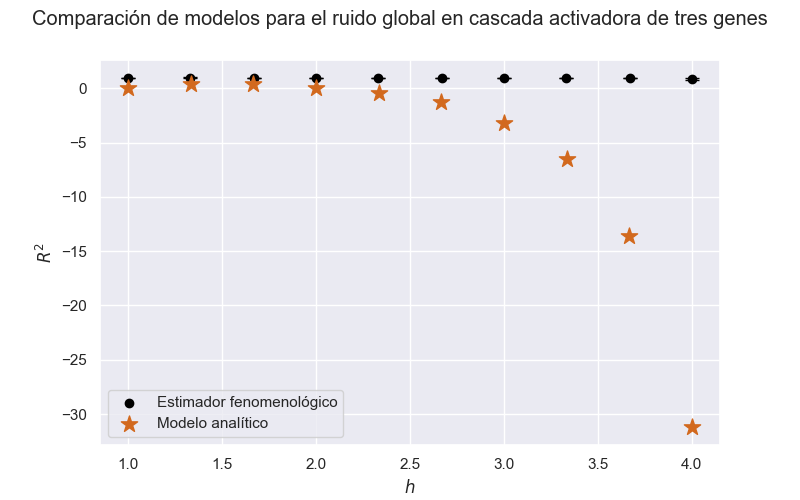

In [21]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2TresAct, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2TresAct, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_act3[i,:,:],calc_act3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_act3[-1,:,:],calc_act3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada activadora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/act3glob.png", dpi=1000)

## Represores

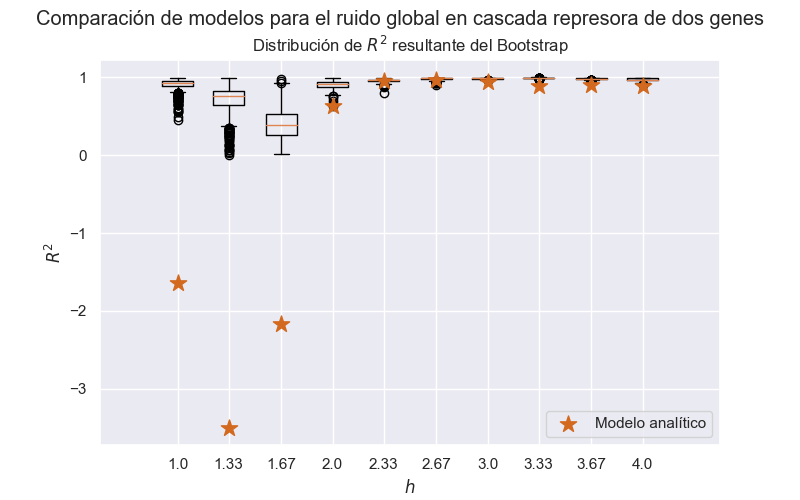

In [22]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2DosRep).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep2[i,:,6],calc_rep2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep2[-1,:,6],calc_rep2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada represora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep2glob.png", dpi=1000)

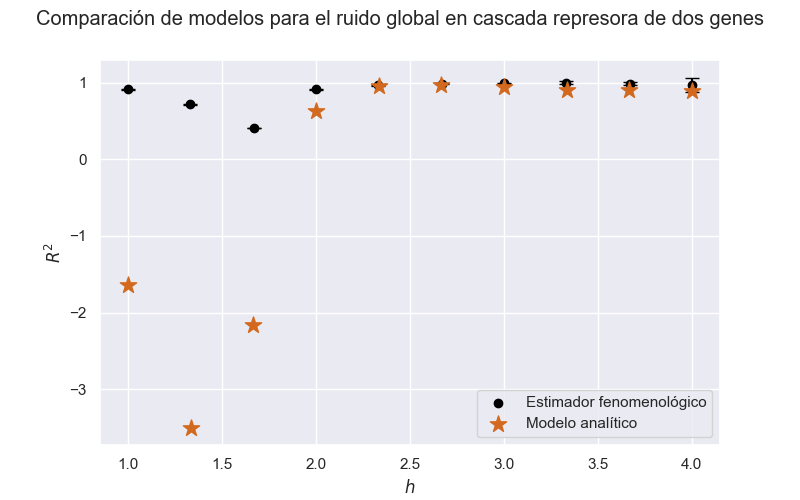

In [23]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2DosRep, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2DosRep, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep2[i,:,6],calc_rep2[i,:,6]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep2[-1,:,6],calc_rep2[-1,:,6]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada represora de dos genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep2glob.png", dpi=1000)

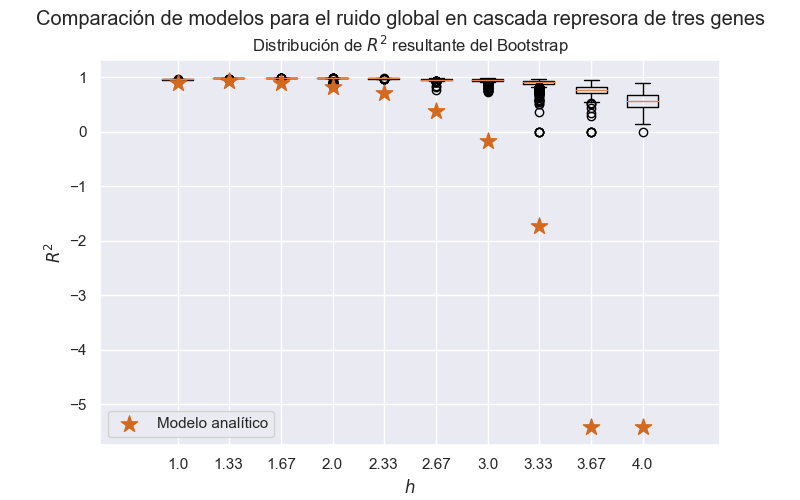

In [24]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.boxplot(np.array(R2TresRep).T, positions=h_list.round(2), widths=0.2)#, label="Modelo fenomenológico")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep3[i,:,:],calc_rep3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep3[i,:,:],calc_rep3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada represora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep3glob.png", dpi=1000)

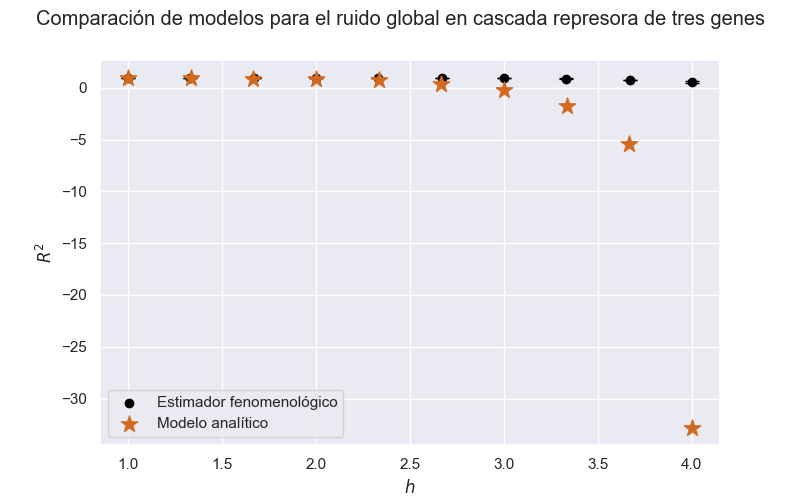

In [25]:
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(111)
_ = ax.scatter(h_list.round(2), np.mean(R2TresRep, axis=1), label="Estimador fenomenológico", c="black")#, widths=0.2)#, label="Modelo fenomenológico")
_ = ax.errorbar(h_list.round(2), np.mean(R2TresRep, axis=1), 1.96*np.std(R2DosAct, axis=1), capsize=5, ls='none', c="black")
for i in range(9):
    ax.scatter(h_list[i], r2_score(exp_rep3[i,:,:],calc_rep3[i,:,:]), c="chocolate", zorder=100, marker="*", s=150)
ax.scatter(h_list[-1], r2_score(exp_rep3[-1,:,:],calc_rep3[-1,:,:]), c="chocolate", zorder=100, marker="*", s=150, label="Modelo analítico")
ax.set_ylabel(r"$R^2$")
ax.set_xlabel(r"$h$")
# ax.set_title(r"Distribución de $R^2$ resultante del Bootstrap")
plt.legend()
plt.suptitle("Comparación de modelos para el ruido global en cascada represora de tres genes")
plt.savefig("GraficasParaGuardar/Rsquared/rep3glob.png", dpi=1000)

# Residuales

In [26]:
# def model(x, A, b, C):
#     return A*np.exp(b*x) + C

def model_dosact(x , A, b, C):
    return A*(x**b) + C

# def model(data, A, b, C, d, K):
#     x, y = data
#     return A*np.exp(b*x) + C*np.exp(d*y) + K

def model_tresact(data, A, b, C, d, K):
    x, y = data
    return A*(x**b) + C*(y**d) + K

# def model(x, A, b, C):
#     return A*np.exp(-b*x) + C
# 
def model_dosrep(x , A, b, C):
    return A*(x**(-b)) + C

# def model(data, A, b, C, d, K):
#     x, y = data
#     return A*np.exp(-b*x) + C*np.exp(-d*y) + K

def model_tresrep(data, A, b, C, d, K):
    x, y = data
    return A*(x**(-b)) + C*(y**(-d)) + K

## Activadores

In [27]:
RepParamsTensor = np.load("EstimadoresRepresores.npy")
np.shape(RepParamsTensor)
RepParamsTensor[1][0][:3].astype(np.float)

C:\Users\aleja\AppData\Local\Temp\ipykernel_19904\2230531577.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RepParamsTensor[1][0][:3].astype(np.float)


array([-0.00385639,  2.01986745,  0.02697071])

C:\Users\aleja\AppData\Local\Temp\ipykernel_19904\664153084.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(exp_rep1[i,:,6], model_dosrep(exp_rep1[i,:,6], *RepParamsTensor[1][i][:3].astype(np.float)), c=colors[i], marker="+")


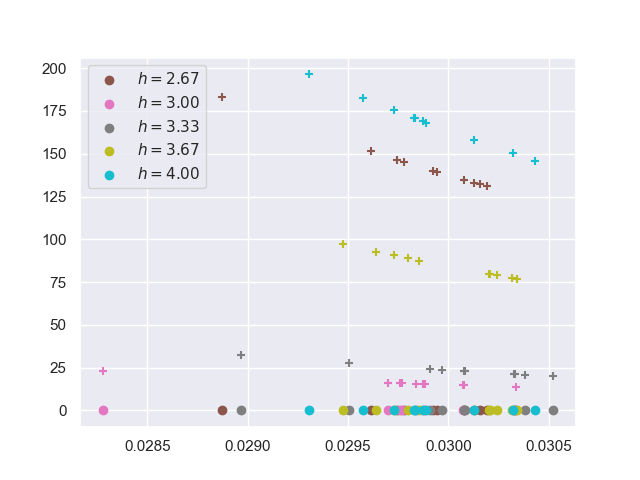

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(5,10):
    ax.scatter(exp_rep1[i,:,6], exp_rep2[i,:,6], label=fr"$h={h_list[i]:.2f}$", c=colors[i])
    ax.scatter(exp_rep1[i,:,6], model_dosrep(exp_rep1[i,:,6], *RepParamsTensor[1][i][:3].astype(np.float)), c=colors[i], marker="+")
plt.legend()

## Represores